#### 專題：爬取PTT專版，整理出流行的詞句與話題
* 選取看板：西洽(C_CHAT)

功能進度，完成後再匯整成一個專案

* ~~撈取前N頁標題~~ 完成
* 將標題丟入jieba斷詞分類(https://ppt.cc/fwWPqx) (需要再過濾介係詞)
* 自定義一些沒有的詞匯入jieba，並帶入繁體中文詞庫 (待新增)
* ~~用圖表呈現字詞出現的頻率(參考以前ML的檔案)~~ 完成
* ~~把結果餵給world cloud 呈現~~ 完成

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba

In [2]:
# 爬頁面

URL_HOME = "https://www.ptt.cc/bbs/C_Chat/index.html"
HEADERS = {
    "user-agent": "Chrome/97.0.4692.71"
}
response = requests.get(url=URL_HOME, headers=HEADERS)
result = BeautifulSoup(response.text, "html5lib")
#result

In [3]:
btn = result.select("div.btn-group a")
btn

[<a class="btn selected" href="/bbs/C_Chat/index.html">看板</a>,
 <a class="btn" href="/man/C_Chat/index.html">精華區</a>,
 <a class="btn wide" href="/bbs/C_Chat/index1.html">最舊</a>,
 <a class="btn wide" href="/bbs/C_Chat/index17591.html">‹ 上頁</a>,
 <a class="btn wide disabled">下頁 ›</a>,
 <a class="btn wide" href="/bbs/C_Chat/index.html">最新</a>]

In [4]:
# 從上可知從第四個的href取得上一頁網址
prevURL = btn[3]['href']
prevURL

'/bbs/C_Chat/index17591.html'

In [5]:
URL_NOW = "https://www.ptt.cc" + prevURL
URL_NOW

'https://www.ptt.cc/bbs/C_Chat/index17591.html'

In [6]:
# 過濾出標題帶入字串

all_title_text = "" #所有標題爬完後的標題字串
#title = ""

def get_title(result):
    current_page_title_text = ""  #當前頁面的標題字串
    for i in result.find_all("div", {"class":"r-ent"}):
        # 過濾標題會有被刪文後變成Nonetype的狀況
        title_name = i.find(class_="title").a
        if title_name is None:
            pass
        else:
            print(title_name.text)
            current_page_title_text += title_name.text

    return current_page_title_text

# 爬一次第一頁
print("首頁")
all_title_text += get_title(result=result)


# 開始帶入之後頁面提取title(可能要把第一頁的爬取寫在一起)
for page in range(100):
    print("第{}頁".format(page+2))
    btn = result.select("div.btn-group a")
    prevURL = btn[3]['href']
    URL_NOW = "https://www.ptt.cc" + prevURL
    response = requests.get(url=URL_NOW, headers=HEADERS)
    result = BeautifulSoup(response.text, "html5lib")
    all_title_text += get_title(result=result)

首頁
[閒聊] VTUBER葛葉化身巨大模特兒
[情報] 因玩家過少，2042南非伺服器遭一人挾持入
[情報] 《素還真》2/12 買一送一
[情報] 《碧血狂殺2》成為歷史銷量第十遊戲
[Vtub] Hololive十九點直播單 (220209)
[閒聊] FF5 隱藏職業亡靈法師能用在哪?
Re: [閒聊] 盜賊基斯如果是好人的話
[閒聊] 微軟索尼不想繼續發展派對遊戲類嗎？
[閒聊] 有人用煉獄杏壽郎的名子捐10萬給政府
[問題] 戰場女武神要怎麼起手
[公告] 看板活動公告彙整 ＆ 置底推文閒聊區
[公告] C_Chat板板規 v.16.7
[公告] C_Chat板主徵選開始&發過年紅包
Fw: [任務] QuestCenter 新春大地遊戲
[公告] 咱就要卸任啦&快來參選板主
第2頁
[方舟]德魯伊藪貓
[閒聊] 中國Vtuber七海 遭遇主席炸彈被ban台
[閒聊] 肯主任抽到誰才能穩贏四戰?
Re: [閒聊] Re: [閒聊] ABuLae阿布雷場外討論消
Re: [閒聊] 寶可夢遊戲還能怎麼進化
[Vtub] 船兔線下連動還會搞嗎？
[閒聊] 炎炎跟嗜魂者誰戰力強？
[Vtub] 垂死之光2應該是bug殭屍直接跳出來嚇死你
Re: [原神] 這遊戲到後來還能幹嘛
[情報] FF7R 蒂法禮服設定小捏他
[閒聊] 如果巨人始祖阿嬤，不擋槍會怎樣
[問題] 悟天打得贏賽魯嗎？
Re: [閒聊] 新石紀 Dr.Stone 228 Life Stone 
[Vtub] 曇音ルカ 歌回
[情報] 萬代南夢宮將投資1.3億鎂打造專屬元宇宙
[原神] 什麼時候才能過蒙德溫泉節
Re: [閒聊] 有沒有突然讓人覺得很有深度的轉折？
Re: [龍珠] 七龍珠哪招在現實中也很實用？
[ＳＣ] 283事務所隔壁的愛情旅館
[閒聊] 海夢和五條一起玩hgame會怎樣呢？
第3頁
[情報] 多喝水鹼性竹炭水推出《鬼滅之刃》聯名包
[fgo] 為什麼巴潔特用逆光劍還會被打到？
[閒聊] 有沒有突然讓人覺得很有深度的轉折？
[情報] 炎炎消防隊漫畫預告兩話後完結
[閒聊]遊戲是本來是讓我玩的，但是 NFT 開始讓遊戲玩我了
[閒聊] 渋谷凛 催眠術挑戰！！
[閒聊] OL被多毛中年大叔射滿臉可以吉嗎
Re: [新聞] 玩家「課金百萬」想加入遊戲公司　慘
[閒聊] 寶可夢阿爾宙斯

In [7]:
#all_title_text

In [8]:
# 過濾標題的屬性符號&空白
all_title_text = all_title_text.replace("[", "")
all_title_text = all_title_text.replace("]", "")
all_title_text = all_title_text.replace(" ", "")

#去除中文常出現的標點符號(ptt會變成全形)
all_title_text = all_title_text.replace("？", "")
all_title_text = all_title_text.replace("，", "")
all_title_text = all_title_text.replace("。", "")
all_title_text = all_title_text.replace("！", "")
all_title_text = all_title_text.replace("《", "")
all_title_text = all_title_text.replace("》", "")

#去除中文常出現的介係詞、語尾詞等
all_title_text = all_title_text.replace("嗎", "")
all_title_text = all_title_text.replace("齁", "")
all_title_text = all_title_text.replace("的", "")
all_title_text = all_title_text.replace("了", "")
all_title_text = all_title_text.replace("會", "")
all_title_text = all_title_text.replace("有", "")
all_title_text = all_title_text.replace("在", "")
all_title_text = all_title_text.replace("再", "")
all_title_text = all_title_text.replace("跟", "")
all_title_text = all_title_text.replace("很", "")
all_title_text = all_title_text.replace("吧", "")
all_title_text = all_title_text.replace("啊", "")
all_title_text = all_title_text.replace("為", "")
all_title_text = all_title_text.replace("不", "")
all_title_text = all_title_text.replace("沒", "")
all_title_text = all_title_text.replace("是不是", "")
all_title_text = all_title_text.replace("是", "")
all_title_text = all_title_text.replace("什麼", "")
all_title_text = all_title_text.replace("甚麼", "")
all_title_text = all_title_text.replace("為何", "")
all_title_text = all_title_text.replace("為什麼", "")
all_title_text = all_title_text.replace("如果", "")
all_title_text = all_title_text.replace("怎麼", "")
all_title_text = all_title_text.replace("怎樣", "")



#去除西洽版中過常出現與內容無關的文字(如：標題類型)
all_title_text = all_title_text.replace("閒聊", "")
all_title_text = all_title_text.replace("Re:", "")
all_title_text = all_title_text.replace("Fw:", "")
all_title_text = all_title_text.replace("公告", "")
all_title_text = all_title_text.replace("情報", "")
all_title_text = all_title_text.replace("討論", "")
all_title_text = all_title_text.replace("問題", "")


# 去除英文上的標點符號
import string
all_title_text = all_title_text.translate(str.maketrans('', '', string.punctuation))

In [9]:
# 設定jieba
# 使用繁體中文詞庫
jieba.set_dictionary('./Data/dict.txt.big')

# 使用預設的精確模式
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

# 自定義字典，把一些專門字詞or術語加入

jieba.load_userdict('./Data/userDict.txt')
#print(jieba.lcut(all_title_text))

Building prefix dict from o:\PyCrawlerMarathon\homework\Data\dict.txt.big ...
Loading model from cache C:\Users\GSX-40~1\AppData\Local\Temp\jieba.u68c22222193cad0ec588c535d654ef9c.cache
Loading model cost 1.165 seconds.
Prefix dict has been built successfully.


預設: VTUBER|葛葉|化身|巨大|模特兒|因|玩家|過少|2042|南非|伺服器|遭一人|挾持|入|素還真|212|買一送一|碧血|狂殺|2|成|歷史|銷量|第十|遊戲|VtubHololive|十九點|直播|單|220209FF5|隱藏|職業|亡靈|法師|能用|哪|盜賊|基斯|好人|話|微軟|索尼|想|繼續|發展|派對|遊戲類|人用|煉獄|杏壽郎|名子|捐|10|萬給|政府|戰場|女|武神|要|起手|看板|活動|彙|整|＆|置底|推文區|CChat|板板規|v167CChat|板主徵選|開始|發過|年|紅包|任務|QuestCenter|新春|大地|遊戲|咱|就要|卸任|啦|快來|參選|板主|方舟|德魯伊|藪貓|中國|Vtuber|七海|遭遇|主席|炸彈|被|ban|台肯|主任|抽到|誰|才能|穩贏|四戰|ABuLae|阿|布雷|場外|消寶可夢|遊戲|還能|進化|Vtub|船兔|線下|連動|還搞|炎炎|嗜魂者|誰|戰力|強|Vtub|垂死|之光|2|應該|bug|殭屍|直接|跳|出來|嚇死|你|原神|這|遊戲|到|後來|還能|幹嘛|FF7R|蒂法|禮服|設定|小|捏|他|巨人|始祖|阿嬤擋|槍悟天|打得贏|賽魯新|石紀|DrStone228LifeStoneVtub|曇音|ル|カ|歌回|萬代|南夢|宮將|投資|13|億鎂|打造|專屬|元|宇宙|原神|時候|才能|過蒙德|溫泉|節|突然|讓|人|覺得|深度|轉折|龍珠|七龍珠|哪招|現實|中|也|實用|Ｓ|Ｃ|283|事務所|隔壁|愛情|旅館|海夢|和|五條|一起|玩|hgame|呢|多喝水|鹼性|竹炭|水|推出|鬼滅|之刃|聯名|包|fgo|巴潔|特用|逆光|劍還|被|打|到|突然|讓|人|覺得|深度|轉折|炎炎|消防隊|漫畫|預告|兩話|後|完結|遊戲|本來|讓|我|玩|但|NFT|開始|讓|遊戲|玩|我|渋|谷|凛|催眠術|挑戰|OL|被|多毛|中年|大叔|射|滿臉|可以|吉|新聞|玩家|「|課|金百萬|」|想|加入|遊戲|公司|　|慘寶可夢|阿爾|宙斯|畫冊|集|（|圖多|）|啥|中國|人|做出|具|中國|味|SIFU|睡犬|說|到|皮影戲|巔峰|週刊|少年|JUMP2022|年|11|號|順位|剁|手|FGO|新增|徹底|刪帳|功能|遊戲|本來|讓|我|玩|但|NFT|開始|讓|遊戲|玩|我|剁|手|

In [10]:
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

預設: VTUBER|葛葉|化身|巨大|模特兒|因|玩家|過少|2042|南非|伺服器|遭一人|挾持|入|素還真|212|買一送一|碧血|狂殺|2|成|歷史|銷量|第十|遊戲|VtubHololive|十九點|直播|單|220209FF5|隱藏|職業|亡靈|法師|能用|哪|盜賊|基斯|好人|話|微軟|索尼|想|繼續|發展|派對|遊戲類|人用|煉獄|杏壽郎|名子|捐|10|萬給|政府|戰場|女|武神|要|起手|看板|活動|彙|整|＆|置底|推文區|CChat|板板規|v167CChat|板主徵選|開始|發過|年|紅包|任務|QuestCenter|新春|大地|遊戲|咱|就要|卸任|啦|快來|參選|板主|方舟|德魯伊|藪貓|中國|Vtuber|七海|遭遇|主席|炸彈|被|ban|台肯|主任|抽到|誰|才能|穩贏|四戰|ABuLae|阿布雷|場外|消寶可夢|遊戲|還能|進化|Vtub|船兔|線下|連動|還搞|炎炎|嗜魂者|誰|戰力|強|Vtub|垂死|之光|2|應該|bug|殭屍|直接|跳|出來|嚇死|你|原神|這|遊戲|到|後來|還能|幹嘛|FF7R|蒂法|禮服|設定|小|捏|他|巨人|始祖|阿嬤擋|槍悟天|打得贏|賽魯新|石紀|DrStone228LifeStoneVtub|曇音|ル|カ|歌回|萬代|南夢|宮將|投資|13|億鎂|打造|專屬|元|宇宙|原神|時候|才能|過蒙德|溫泉|節|突然|讓|人|覺得|深度|轉折|龍珠|七龍珠|哪招|現實|中|也|實用|Ｓ|Ｃ|283|事務所|隔壁|愛情|旅館|海夢|和|五條|一起|玩|hgame|呢|多喝水|鹼性|竹炭水|推出|鬼滅之刃|聯名|包|fgo|巴潔|特用|逆光|劍還|被|打|到|突然|讓|人|覺得|深度|轉折|炎炎|消防隊|漫畫|預告|兩話|後|完結|遊戲|本來|讓|我|玩|但|NFT|開始|讓|遊戲|玩|我|渋谷凛|催眠術|挑戰|OL|被|多毛|中年|大叔|射|滿臉|可以|吉|新聞|玩家|「|課|金百萬|」|想|加入|遊戲|公司|　|慘寶可夢|阿爾宙斯|畫冊|集|（|圖多|）|啥|中國|人|做出|具|中國|味|SIFU|睡犬|說|到|皮影戲|巔峰|週刊少年JUMP|2022|年|11|號|順位|剁手|FGO|新增|徹底|刪帳|功能|遊戲|本來|讓|我|玩|但|NFT|開始|讓|遊戲|玩|我|剁手|FGO|新增|徹底

In [11]:
word_list = jieba.lcut(all_title_text)

In [12]:
# 利用 collection 的 Counter 計算頻率
from collections import Counter
dict_text = Counter(word_list)
dict_text

import pandas as pd
# https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
df = pd.DataFrame.from_dict(dict_text, orient="index").reset_index().rename(columns={'index':'單字', 0:'次數'})
df = df.sort_values(by="次數", ascending=False)
df

,單字,次數
110,Vtub,92
141,巨人,86
24,遊戲,67
491,鬼滅,48
208,漫畫,47
...,...,...
2385,國外,1
2386,來說,1
2387,新鮮,1
2388,夠煩,1


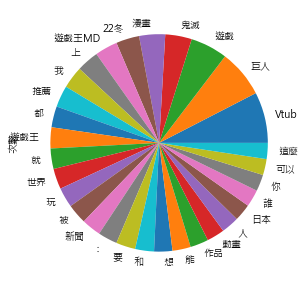

In [13]:
# 以圓餅圖呈現(TOP10)
# matplotlib 中文顯示問題
# https://ppt.cc/fTbrPx
plt.rcParams['axes.unicode_minus'] = False
df = df.set_index("單字").head(30)
df.plot(kind="pie", subplots=True, legend=False, figsize=(5,5))
plt.show()

In [37]:
# 使用wordcloud的generate_from_frequency生成文字雲

from wordcloud import WordCloud
#text = word_list
my_dpi = 100
cloud = WordCloud(font_path="./Data/竹風體W4.ttc", scale=16).generate_from_frequencies(dict_text)
cloud.to_file('output.png')
#plt.imshow(cloud)

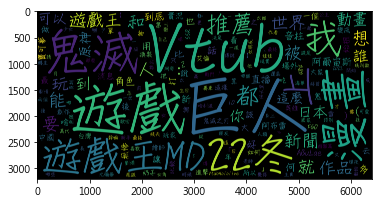

In [38]:
import matplotlib.image as img

image = img.imread('output.png')
plt.imshow(image)